## Partie Optimsation : Arbres et arborescences

Importation de biblio

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import time
Inf=1e+100

Algorithme de Kruskal (1956)
- On part d’une forêt de n arbres réduits chacun à un sommet isolé (n est le nombre de sommets
du graphe G )
- A chaque itération, on ajoute à cette forêt la plus petite arête ne créant pas de cycle avec celles
déjà choisies (autrement dit on obtient une nouvelle forêt en ajoutant cette arête).
- On s’arrête quand on a choisi (n-1) arêtes ou quand on ne trouve plus d’arête (le graphe n’est
pas connexe)

### 1-Implémentation de Kruskal

In [2]:
def Find(Parent,x):
    parent=Parent.copy()
    while parent[x]!=x:
        x=parent[x]
    return x


def Union(Parent,poid,x,y):
    parent=Parent.copy()
    xroot=Find(parent,x)
    yroot=Find(parent,y)
    if xroot != yroot:
        if poid[xroot] > poid[yroot]:
            parent[yroot] = xroot
        else:
            parent[xroot] = yroot
            if poid[xroot]==poid[yroot]:
                poid[xroot]=poid[yroot]+1
    return(parent,poid)

def Parent_X(Parent,x):
    parent=Parent.copy()
    parent[x]=x
    return(parent)

In [3]:
def Kruskal(X,U):
    parent,poid,res = {},{},{}    
    for v in X:
        parent=Parent_X(parent,v)
        poid[v]=0   
    for k in range(len(X)-1):
        temp,x_min,y_min=Inf,None,None
        for x,y in U.keys():
            p=U[x,y]
            if Find(parent,x) != Find(parent,y) and p<temp :
                temp,x_min,y_min=p,x,y
        if x_min is not None and y_min is not None:
            parent,poid=Union(parent,poid,x_min,y_min)
            res[x_min,y_min]=temp
    
    return (res,sum(res.values()))

Pour rsédoudre Exercice 5 on va présenter sa matrice d'adjacence


In [4]:
    G = [[0, 2.6, 4.2, 1.8, 1.4,3.6,4.0,3.0],
         [2.6, 0, 1.8, 3.6, 2.4,5.2,4.6,2.2],
         [4.2, 1.8, 0, 5.2, 3.4,5.0,3.8,2.0],
         [1.8, 3.6, 5.2, 0, 1.4,3.2,3.0,1.8],
         [1.4, 2.4, 3.4, 1.4, 0,1.8,2.1,1.6],
         [3.6, 5.2, 5.0, 3.2, 1.8,0,1.2,2.0],
         [4.0, 4.6, 3.8, 3.0, 2.1,1.2,0,1.0],
         [3.0, 2.2, 2.0, 1.8, 1.6,2.0,1,0]]

Aprés on va présenter les sommets ainsi que le graphe et les arrets selon leurs poids :

In [5]:
A=["0","1","2","3","4","5","6","7"]

B={("1","0"):2.6,("2","0"):4.2,("3","0"):1.8,("4","0"):1.4,
  ("5","0"):3.6,("6","0"):4.0,("7","0"):3.0,("0","1"):2.6,
  ("2","1"):1.8,("3","1"):3.6,("4","1"):2.4,("5","1"):5.2,
  ("6","1"):4.6,("7","1"):2.2,("0","2"):4.2,("1","2"):1.8,
  ("3","2"):5.2,("4","2"):3.4,("5","2"):5.0,("6","2"):3.8,
  ("7","2"):2.0,("0","3"):1.8,("1","3"):3.6,("2","3"):5.2,
  ("4","3"):1.4,("5","3"):3.2,("6","3"):3.0,("7","3"):1.8,
  ("0","4"):1.4,("1","4"):2.4,("2","4"):3.4,("3","4"):1.4,
  ("5","4"):1.8,("6","4"):2.1,("7","4"):1.6,("0","5"):3.6,
  ("1","5"):5.2,("2","5"):5.0,("3","5"):3.2,("4","5"):1.8,
  ("6","5"):1.2,("7","5"):2.0,("0","6"):4.0,("1","6"):4.6,
  ("2","6"):3.8,("3","6"):3.0,("4","6"):2.1,("5","6"):1.2,
  ("7","6"):1.0,("0","7"):3.0,("1","7"):2.2,("2","7"):2.0,
  ("3","7"):1.8,("4","7"):1.6,("5","7"):2.0,("6","7"):1.0,}


In [6]:
t=time.time()
path,weight=Kruskal(A,B)
print("Temps pour l'execution = {:.5f} \n ".format(time.time()-t))
print("Le chemin est = \n {} \n".format(path))
print("La distance total =  {:.3f} \n ".format(weight))           

Temps pour l'execution = 0.00100 
 
Le chemin est = 
 {('7', '6'): 1.0, ('6', '5'): 1.2, ('4', '0'): 1.4, ('4', '3'): 1.4, ('7', '4'): 1.6, ('2', '1'): 1.8, ('7', '2'): 2.0} 

La distance total =  10.400 
 


Algorithme de Prim (1957)

- On part d’un arbre initial T réduit à un sommet quelconque x.
- A chaque itération, on agrandi l’arbre T en le connectant au ‘plus proche’ (au sens des poids)
sommet non encore connecté.
- On s’arrête lorsqu’on a sélectionné (n-1) arêtes ou qu’on ne trouve plus d’arêtes.

### 2-implentation d'algortithme de Prime

In [7]:
def Prim(X,V,s):
    cout,S,T,S_b=0,[s],{},X.copy()
    S_b.remove(s)
    Liste_arete={(j,i):V[i,j] for i,j in V.keys()}
    Liste_arete.update(V)
    for k in range(0,len(X)-1):
        mini,u_min,v_min=Inf,None,None
        for u in S :
            for v in S_b:
                val_dist=Inf
                if (u,v) in Liste_arete.keys():
                    val_dist=Liste_arete[u,v]
                if val_dist<mini:
                    mini,u_min,v_min=val_dist,u,v
        if u_min is not None and v_min is not None:
            S_b.remove(v_min)
            T[u_min,v_min]=mini
            S.append(v_min)
            cout=cout+mini
            
    return(T,cout)

In [8]:
A=["0","1","2","3","4","5","6","7"]

B={("1","0"):2.6,("2","0"):4.2,("3","0"):1.8,("4","0"):1.4,
  ("5","0"):3.6,("6","0"):4.0,("7","0"):3.0,("0","1"):2.6,
  ("2","1"):1.8,("3","1"):3.6,("4","1"):2.4,("5","1"):5.2,
  ("6","1"):4.6,("7","1"):2.2,("0","2"):4.2,("1","2"):1.8,
  ("3","2"):5.2,("4","2"):3.4,("5","2"):5.0,("6","2"):3.8,
  ("7","2"):2.0,("0","3"):1.8,("1","3"):3.6,("2","3"):5.2,
  ("4","3"):1.4,("5","3"):3.2,("6","3"):3.0,("7","3"):1.8,
  ("0","4"):1.4,("1","4"):2.4,("2","4"):3.4,("3","4"):1.4,
  ("5","4"):1.8,("6","4"):2.1,("7","4"):1.6,("0","5"):3.6,
  ("1","5"):5.2,("2","5"):5.0,("3","5"):3.2,("4","5"):1.8,
  ("6","5"):1.2,("7","5"):2.0,("0","6"):4.0,("1","6"):4.6,
  ("2","6"):3.8,("3","6"):3.0,("4","6"):2.1,("5","6"):1.2,
  ("7","6"):1.0,("0","7"):3.0,("1","7"):2.2,("2","7"):2.0,
  ("3","7"):1.8,("4","7"):1.6,("5","7"):2.0,("6","7"):1.0,}

In [9]:
t=time.time()
path,weight=Prim(A,B,A[0])
print("Temps pour l'execution = {:.5f} \n ".format(time.time()-t))
print("Le chemin est = \n {} \n".format(path))
print("La distance total =  {:.3f} \n ".format(weight))     

Temps pour l'execution = 0.00000 
 
Le chemin est = 
 {('0', '4'): 1.4, ('4', '3'): 1.4, ('4', '7'): 1.6, ('7', '6'): 1.0, ('6', '5'): 1.2, ('7', '2'): 2.0, ('2', '1'): 1.8} 

La distance total =  10.400 
 


### Conclusion sur exercice 5 :

Pour , l'exerice 5 , le temps d'exuction est trop faible pour les deux algorithmes , on  ne peut pas comparer les  algo dans ce cas.
Pour cela , on va tester le temps d'execution de nos algorithmes avec des fichiers contenant plus de sommets.

### 3-Test et comparison

### Test avec les fichiers et comparer le temps de l'execution pour les 2 algo

In [10]:
file280=pd.read_table("a280.tsp.txt",header=None,sep="\s+")
file1000=pd.read_table("dsj1000.tsp.txt",header=None,sep="\s+")
file4461=pd.read_table("fnl4461.tsp.txt",header=None,sep="\s+")
file85900=pd.read_table("pla85900.tsp.txt",header=None,sep="\s+")

In [11]:
def import_graph(df):
    X=list(df.iloc[:,0])
    df=df.values
    G=[]
    for row in df:
        for k in df:
            if not np.array_equal(row,k):
                G.append([row[0],k[0],np.sqrt((k[1]-row[1])*(k[1]-row[1])+(k[2]-row[2])*(k[2]-row[2]))])
        df=np.delete(df, 0, 0)
    W={(a,b):c for a,b,c in G}
    
    return(X,W)
    

### Fichier a280

Lire le fichier et loader les graphes

In [12]:
A280,B280=import_graph(file280)


Tester le fichier a280 avec 280 sommets avec algo de Kruskal

In [13]:
t=time.time()
path,weight=Kruskal(A280,B280)
print("Temps pour l'execution = {:.5f} \n ".format(time.time()-t))
print("Le chemin est = \n {} \n".format(path))
print("La distance total =  {} \n ".format(weight))   

Temps pour l'execution = 74.93194 
 
Le chemin est = 
 {('171', '172'): 0.0, ('7', '8'): 8.0, ('8', '9'): 8.0, ('8', '10'): 8.0, ('10', '11'): 8.0, ('11', '12'): 8.0, ('12', '13'): 8.0, ('13', '14'): 8.0, ('13', '15'): 8.0, ('16', '271'): 8.0, ('17', '18'): 8.0, ('18', '19'): 8.0, ('18', '133'): 8.0, ('19', '20'): 8.0, ('19', '132'): 8.0, ('20', '21'): 8.0, ('20', '131'): 8.0, ('21', '128'): 8.0, ('21', '130'): 8.0, ('22', '25'): 8.0, ('22', '26'): 8.0, ('23', '24'): 8.0, ('23', '25'): 8.0, ('26', '27'): 8.0, ('27', '28'): 8.0, ('30', '31'): 8.0, ('30', '125'): 8.0, ('31', '32'): 8.0, ('35', '36'): 8.0, ('37', '38'): 8.0, ('38', '39'): 8.0, ('39', '40'): 8.0, ('40', '41'): 8.0, ('41', '42'): 8.0, ('42', '43'): 8.0, ('43', '60'): 8.0, ('44', '45'): 8.0, ('44', '57'): 8.0, ('44', '59'): 8.0, ('45', '46'): 8.0, ('45', '56'): 8.0, ('46', '47'): 8.0, ('46', '55'): 8.0, ('47', '48'): 8.0, ('47', '54'): 8.0, ('48', '49'): 8.0, ('48', '53'): 8.0, ('49', '50'): 8.0, ('49', '52'): 8.0, ('50', '5

Tester le fichier a280 avec 280 sommets avec algo de Prim

In [14]:
t=time.time()
path,weight=Prim(A280,B280,A280[0])
print("Temps pour l'execution = {:.5f} \n ".format(time.time()-t))
print("Le chemin est = \n {} \n".format(path))
print("La distance total =  {:.3f} \n ".format(weight))    

Temps pour l'execution = 2.70935 
 
Le chemin est = 
 {('1', '280'): 17.88854381999832, ('280', '2'): 8.94427190999916, ('280', '3'): 10.0, ('3', '279'): 10.770329614269007, ('279', '278'): 8.94427190999916, ('279', '4'): 12.649110640673518, ('4', '277'): 10.0, ('277', '276'): 10.770329614269007, ('276', '275'): 8.0, ('275', '274'): 8.0, ('274', '273'): 8.0, ('273', '272'): 8.0, ('272', '271'): 8.0, ('271', '16'): 8.0, ('276', '6'): 15.620499351813308, ('6', '5'): 10.0, ('6', '7'): 15.620499351813308, ('7', '8'): 8.0, ('8', '9'): 8.0, ('8', '10'): 8.0, ('10', '11'): 8.0, ('11', '12'): 8.0, ('12', '13'): 8.0, ('13', '14'): 8.0, ('13', '15'): 8.0, ('16', '17'): 16.0, ('17', '18'): 8.0, ('18', '19'): 8.0, ('18', '133'): 8.0, ('19', '20'): 8.0, ('19', '132'): 8.0, ('20', '21'): 8.0, ('20', '131'): 8.0, ('21', '128'): 8.0, ('21', '130'): 8.0, ('128', '127'): 8.0, ('128', '129'): 8.0, ('127', '126'): 8.0, ('126', '125'): 12.0, ('125', '30'): 8.0, ('125', '124'): 8.0, ('30', '31'): 8.0, ('124

### Fichier dsj1000

Lire le fichier et loader les graphes

In [29]:
A1000,B1000=import_graph(file1000)


Tester le fichier dsj1000 avec 1000 sommets avec algo de Kruskal

In [16]:
t=time.time()
path,weight=Kruskal(A1000,B1000)
print("Temps pour l'execution = {:.5f} \n ".format(time.time()-t))
print("Le chemin est = \n {} \n".format(path))
print("La distance total =  {} \n ".format(weight))  

Temps pour l'execution = 8366.97804 
 
Le chemin est = 
 {('637', '983'): 679.9088174159826, ('18', '364'): 692.3445673940108, ('33', '359'): 755.4137938904743, ('896', '997'): 847.7169338877218, ('728', '817'): 876.3041709360969, ('316', '334'): 899.4498318416653, ('551', '835'): 1226.9800324373662, ('47', '885'): 1490.6649522947805, ('963', '972'): 1727.3520197110952, ('739', '812'): 1730.0199420815934, ('697', '698'): 1744.6243148597923, ('282', '498'): 1771.589681613663, ('618', '637'): 1775.626086764891, ('211', '460'): 1953.9541959831095, ('100', '383'): 2029.3410260476182, ('936', '1000'): 2115.558555086576, ('888', '929'): 2123.9606870184766, ('217', '906'): 2162.0037002743543, ('143', '355'): 2395.43273752364, ('274', '752'): 2432.950883186917, ('103', '848'): 2450.8718856766054, ('469', '669'): 2611.8669567954644, ('82', '146'): 2626.130994447916, ('14', '485'): 2649.2415895874806, ('49', '854'): 2688.699499758201, ('10', '354'): 2783.3621754992646, ('444', '993'): 2807.92539

Tester le fichier dsj1000 avec 1000 sommets avec algo de Prim

In [17]:
t=time.time()
path,weight=Prim(A1000,B1000,A1000[0])
print("Temps pour l'execution = {:.5f} \n ".format(time.time()-t))
print("Le chemin est = \n {} \n".format(path))
print("La distance total =  {:.3f} \n ".format(weight)) 

Temps pour l'execution = 118.86670 
 
Le chemin est = 
 {('1', '914'): 4327.649246415425, ('1', '324'): 10054.150685164808, ('324', '300'): 5759.611097982224, ('300', '77'): 8544.691275874162, ('77', '971'): 7653.8025190097505, ('971', '757'): 7592.49135659699, ('757', '385'): 8617.394327753605, ('1', '817'): 10986.961818446445, ('817', '728'): 876.3041709360969, ('728', '871'): 17175.33979285417, ('871', '659'): 13169.572696181149, ('659', '422'): 16373.759006410226, ('422', '248'): 14341.806022952618, ('871', '21'): 18349.45737617328, ('21', '624'): 11625.191826374306, ('624', '250'): 5363.465763850833, ('624', '608'): 13916.938492355279, ('608', '196'): 12386.369605336344, ('196', '633'): 9057.179086227676, ('633', '521'): 12705.857900984096, ('521', '348'): 12991.027826927322, ('521', '858'): 15597.954128667003, ('858', '292'): 19300.451212342163, ('292', '620'): 7726.786718940804, ('620', '797'): 9027.79070426425, ('797', '952'): 4816.965538593773, ('952', '561'): 14383.8360669190

### Fichier fnl4461

Lire le fichier et loader les graphes

In [7]:
A4461,B4461=import_graph(file4461)


Tester le fichier fnl4461 avec 4461 sommets avec algo de Kruskal

In [ ]:
t=time.time()
path,weight=Kruskal(A4461,B4461)
print("Temps pour l'execution = {:.5f} \n ".format(time.time()-t))
print("Le chemin est = \n {} \n".format(path))
print("La distance total =  {} \n ".format(weight))  

Tester le fichier fnl4461 avec 4461 sommets avec algo de Prim

In [ ]:
t=time.time()
path,weight=Prim(A4461,B4461,A4461[0])
print("Temps pour l'execution = {:.5f} \n ".format(time.time()-t))
print("Le chemin est = \n {} \n".format(path))
print("La distance total =  {:.3f} \n ".format(weight)) 

### Fichier pla85900

Lire le fichier et loader les graphes

In [ ]:
A85900,B85900=import_graph(file85900)


Tester le fichier file85900 avec 85900 sommets avec algo de Kruskal

In [ ]:
t=time.time()
path,weight=Kruskal(A85900,B85900)
print("Temps pour l'execution = {:.5f} \n ".format(time.time()-t))
print("Le chemin est = \n {} \n".format(path))
print("La distance total =  {} \n ".format(weight))  

Tester le fichier fnl4461 avec 4461 sommets avec algo de Prim

In [ ]:
t=time.time()
path,weight=Prim(A85900,B85900,A85900[0])
print("Temps pour l'execution = {:.5f} \n ".format(time.time()-t))
print("Le chemin est = \n {} \n".format(path))
print("La distance total =  {:.3f} \n ".format(weight)) 

## Comparaison et conculsion  :

Pour , l'exerice 5 , le temps d'exuction est trop faible pour les deux algorithmes , on  ne peut pas comparer les  algo dans ce cas.

Pour cela , on va tester le temps d'execution de nos algorithmes avec des fichiers contenant plus de sommets.

Alors , pour dsj1000 et a280 on a trouvé comme comaprison par rapport le temps de l'execution :

Pour fichier a280 :
Temps pour l'execution avec l'algorithm de Kruskal pour 280 sommets = 74.93194  
Temps pour l'execution avec l'algorithm de Prim pour 280 sommets = 2.70935 

Pour fichier dsj1000 :
Temps pour l'execution avec l'algorithm de Kruskal pour 1000 sommets = 8366.97804 
Temps pour l'execution avec l'algorithm de Prim pour 280 sommets = 118.86670 


On peut bien constater , que l'algorithme prends plus de temps d'execution par rapport l'algorihme de Prim.
Alors , l'algorithme de Prim est plus rapide (moins de complexité) par rapport l'algorithme de Kruskal.



Pour les fichiers pla85900 et fnl4461 , on a un grand nombre de sommets et le temps de l'exuction prends des heures et des heures ce qui déja pas supportable avec la puissance de ma pauvre machine :(.

### 4- Classification hiérarchique ascendante : on veut classer les sommets en 3 classes. Donner le résultat pour les quatre graphes (listes de sommets et figure).




In [15]:
def Figure_Graphe(A,B,check=False):
    G = nx.Graph()
    for i in A:
        G.add_node(i)    
    temp=[]
    for a,b in B.keys():
        temp.append((a,b,B[a,b]))
    G.add_weighted_edges_from(temp)
    pos = nx.spring_layout(G, iterations=10,weight='weight')
    labels = nx.get_edge_attributes(G, 'weight')
    edges = G.edges()
    nx.draw(G, pos,with_labels=True,font_size=12)
    d=nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.axis('off')
    plt.show()
    if check:
        xa=nx.minimum_spanning_tree(G)
        print("minimal tree :{}".format(xa.size(weight="weight")))

In [16]:
import matplotlib.pyplot as plt

def Classification_Ascendante(A,B,classes):
    parent,poid,res = {},{},{}    
    for v in A:
        parent=Parent_X(parent,v)
        poid[v]=0   
    for k in range(len(A)-classes):
        temp,x_min,y_min=Inf,None,None
        for x,y in B.keys():
            p=B[x,y]
            if Find(parent,x) != Find(parent,y) and p<temp :
                temp,x_min,y_min=p,x,y
        if x_min is not None and y_min is not None:
            parent,poid=Union(parent,poid,x_min,y_min)
            res[x_min,y_min]=temp
    
    return res

### Classification hiérarchique ascendante pour ex5

In [17]:
A=["0","1","2","3","4","5","6","7"]

B={("1","0"):2.6,("2","0"):4.2,("3","0"):1.8,("4","0"):1.4,
  ("5","0"):3.6,("6","0"):4.0,("7","0"):3.0,("0","1"):2.6,
  ("2","1"):1.8,("3","1"):3.6,("4","1"):2.4,("5","1"):5.2,
  ("6","1"):4.6,("7","1"):2.2,("0","2"):4.2,("1","2"):1.8,
  ("3","2"):5.2,("4","2"):3.4,("5","2"):5.0,("6","2"):3.8,
  ("7","2"):2.0,("0","3"):1.8,("1","3"):3.6,("2","3"):5.2,
  ("4","3"):1.4,("5","3"):3.2,("6","3"):3.0,("7","3"):1.8,
  ("0","4"):1.4,("1","4"):2.4,("2","4"):3.4,("3","4"):1.4,
  ("5","4"):1.8,("6","4"):2.1,("7","4"):1.6,("0","5"):3.6,
  ("1","5"):5.2,("2","5"):5.0,("3","5"):3.2,("4","5"):1.8,
  ("6","5"):1.2,("7","5"):2.0,("0","6"):4.0,("1","6"):4.6,
  ("2","6"):3.8,("3","6"):3.0,("4","6"):2.1,("5","6"):1.2,
  ("7","6"):1.0,("0","7"):3.0,("1","7"):2.2,("2","7"):2.0,
  ("3","7"):1.8,("4","7"):1.6,("5","7"):2.0,("6","7"):1.0,}

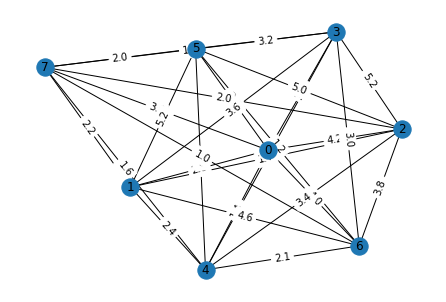

In [18]:
Figure_Graphe(A,B)

In [19]:
x=Classification_Ascendante(A,B,3)

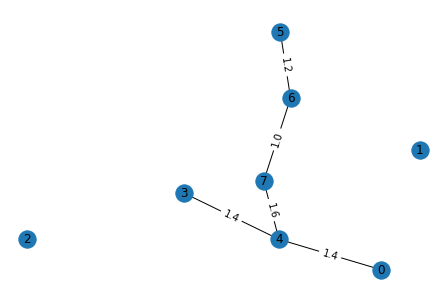

In [20]:
Figure_Graphe(A,x)

On peut bien constater 3 classes. Une 1ere classe composée par (1) , une 2eme classé composée par (2) et une troisieme classe composée par (3,4,0,7,6,5)

### Classification hiérarchique ascendante pour a280

In [27]:
t=time.time()
path=Classification_Ascendante(A280,B280,classes=3)
print("Temps pour l'execution = {:.5f} \n ".format(time.time()-t))
print("Le chemin est = \n {} \n".format(path))
print("La distance total =  {} \n ".format(weight))   

Temps pour l'execution = 92.78773 
 
Le chemin est = 
 {('171', '172'): 0.0, ('7', '8'): 8.0, ('8', '9'): 8.0, ('8', '10'): 8.0, ('10', '11'): 8.0, ('11', '12'): 8.0, ('12', '13'): 8.0, ('13', '14'): 8.0, ('13', '15'): 8.0, ('16', '271'): 8.0, ('17', '18'): 8.0, ('18', '19'): 8.0, ('18', '133'): 8.0, ('19', '20'): 8.0, ('19', '132'): 8.0, ('20', '21'): 8.0, ('20', '131'): 8.0, ('21', '128'): 8.0, ('21', '130'): 8.0, ('22', '25'): 8.0, ('22', '26'): 8.0, ('23', '24'): 8.0, ('23', '25'): 8.0, ('26', '27'): 8.0, ('27', '28'): 8.0, ('30', '31'): 8.0, ('30', '125'): 8.0, ('31', '32'): 8.0, ('35', '36'): 8.0, ('37', '38'): 8.0, ('38', '39'): 8.0, ('39', '40'): 8.0, ('40', '41'): 8.0, ('41', '42'): 8.0, ('42', '43'): 8.0, ('43', '60'): 8.0, ('44', '45'): 8.0, ('44', '57'): 8.0, ('44', '59'): 8.0, ('45', '46'): 8.0, ('45', '56'): 8.0, ('46', '47'): 8.0, ('46', '55'): 8.0, ('47', '48'): 8.0, ('47', '54'): 8.0, ('48', '49'): 8.0, ('48', '53'): 8.0, ('49', '50'): 8.0, ('49', '52'): 8.0, ('50', '5

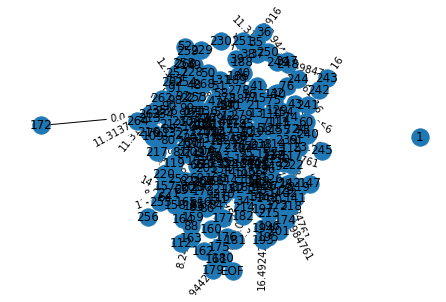

In [28]:
Figure_Graphe(A280,path)

On peut bien constater 3 classes. Une 1ere classe composée par (1) , une 2eme classé composée par (172) et une troisieme classe composée par le reste.